# In this file we create an ANN model after hyper parameter tuning with best perimeters.

In [1]:
##  Import Libraries

import pandas as pd
import sqlite3 as sql
from keras.src.models import Sequential
from keras.src.layers import Dense , Dropout
from keras.src.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.src.optimizers import Adam
from keras.src.callbacks import EarlyStopping
from keras.src.regularizers import L2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Read the raw data from sql table.

conn = sql.connect('../DataBase/TrainingData.db')
query="SELECT * FROM HealthData"
df = pd.read_sql_query(query, conn)

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:

## Selecting all columns which have type = object.
cat_col=[col for col in df.columns if df[col].dtype == 'object']

encoder=LabelEncoder()
for col in cat_col:
    
    df[col]=encoder.fit_transform(df[col])

In [13]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [ ]:
## Spliting data into train and test data

X=df.iloc[:,:-1]
y=df['NObeyesdad']

x_train,  x_test, y_train , y_test =train_test_split(X,y, test_size=0.2, random_state=42)

x_train.shape,  x_test.shape, y_train.shape , y_test.shape

((1688, 16), (423, 16), (1688,), (423,))

In [15]:
## One-Hot encoding for target vaariable
y_test = to_categorical(y_test, 7)
y_train = to_categorical(y_train, 7)


In [16]:
## Scaling the data by using StandardScaler


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building the ANN model with the hyper perimeters

In [17]:
## Building the ANN model

model=Sequential()

## Input layer
model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=L2(0.001) ))

## hidden and dropout layer 1
model.add(Dense(128, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.4))

## hidden and dropout layer 2
model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.3))

## hidden and dropout layer 3
model.add(Dense(48, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.3))

## Output Layer.
model.add(Dense(7, activation='softmax'))


# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [18]:
## Train the model

history = model.fit(x_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2772 - loss: 1.9440 - val_accuracy: 0.5976 - val_loss: 1.1466
Epoch 2/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5287 - loss: 1.2556 - val_accuracy: 0.7485 - val_loss: 0.8066
Epoch 3/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.9759 - val_accuracy: 0.7692 - val_loss: 0.7247
Epoch 4/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7264 - loss: 0.8821 - val_accuracy: 0.8462 - val_loss: 0.6201
Epoch 5/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.8321 - val_accuracy: 0.8284 - val_loss: 0.6632
Epoch 6/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.7218 - val_accuracy: 0.8905 - val_loss: 0.5987
Epoch 7/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss: 0.6903 - val_accuracy: 0.8846 - val_loss: 0.5247
Epoch 8/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.6497 - val_accuracy: 0.8639 - 

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.4215
Test Loss: 0.3968512713909149
Test Accuracy: 0.9338061213493347


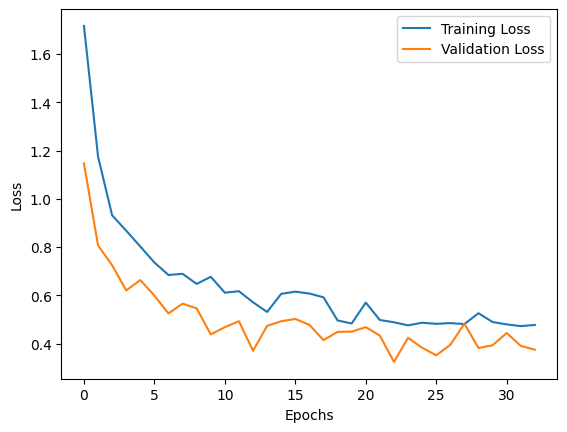

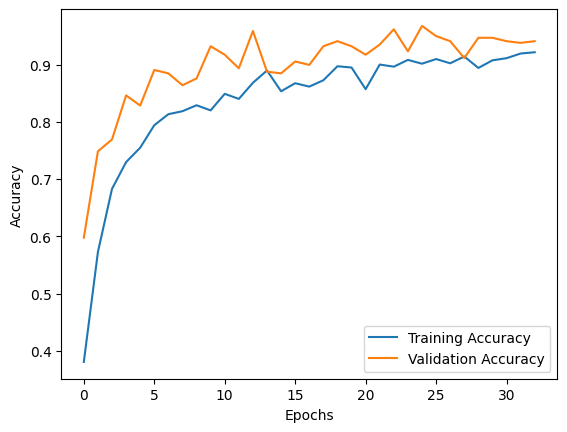

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Overfitting Problem After Hyperparameter Tuning and Solution Summary

After hyperparameter tuning, our model initially showed signs of overfitting, where training accuracy was high, but validation accuracy was significantly lower, indicating poor generalization to unseen data. Overfitting occurs when the model learns too many specific details from the training data, making it less effective on new data.

To address overfitting, we applied the following solutions:

- Dropout Layers: Added dropout layers to reduce reliance on specific neurons, making the model more robust and preventing overfitting.
- L2 Regularization: Introduced L2 regularization in dense layers to penalize large weights, encouraging the model to find simpler, generalizable patterns.
- Learning Rate Scheduler: Used a learning rate scheduler to gradually reduce the learning rate, allowing finer adjustments toward the end of training, which prevents overshooting the optimal weights.
- Early Stopping: Implemented early stopping to halt training once validation loss stopped improving, avoiding excessive fitting to training data.

With these adjustments, the model’s training and validation accuracy and loss became nearly similar, demonstrating improved generalization and reduced overfitting.